# Code to Plot Figures

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('/home/jupyter/ee_tree_counting/Report')

In [15]:
# Load the Excel file
file_path = '/home/jupyter/ee_tree_counting/Report/Training Loss Curves.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
df = pd.read_excel(xls, sheet_name='Sheet1')

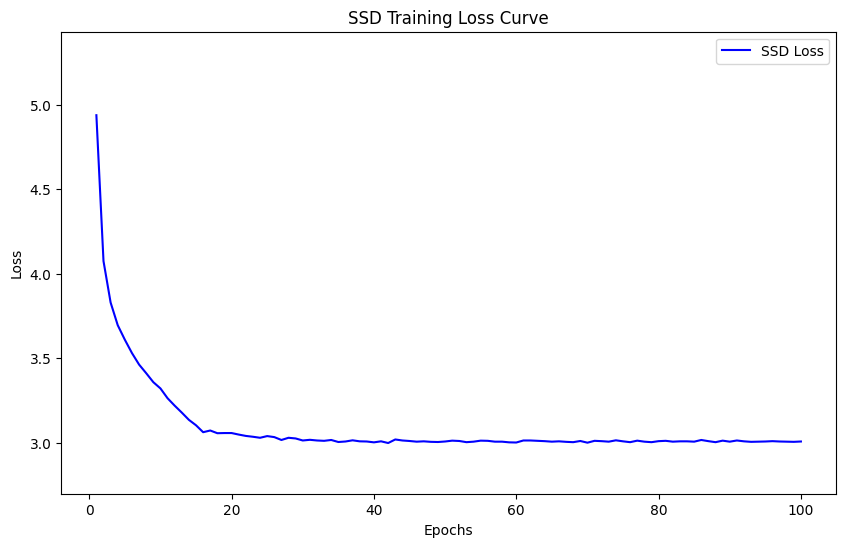

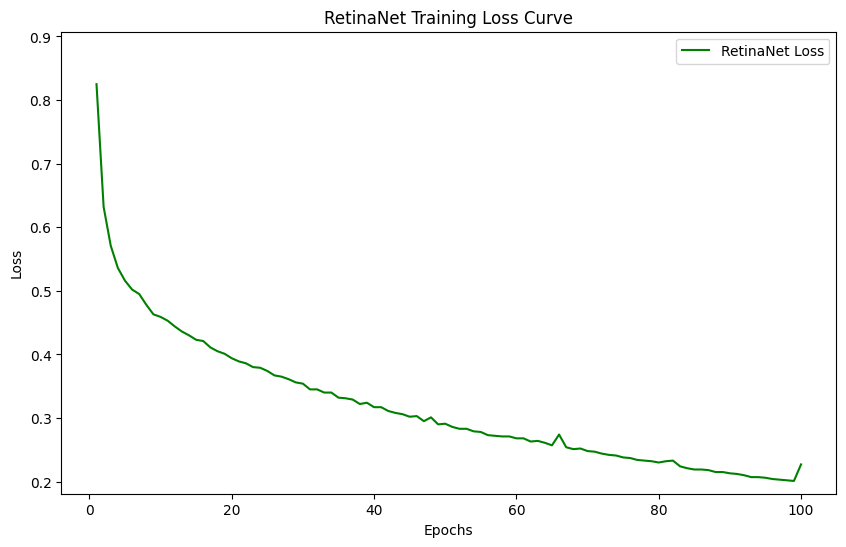

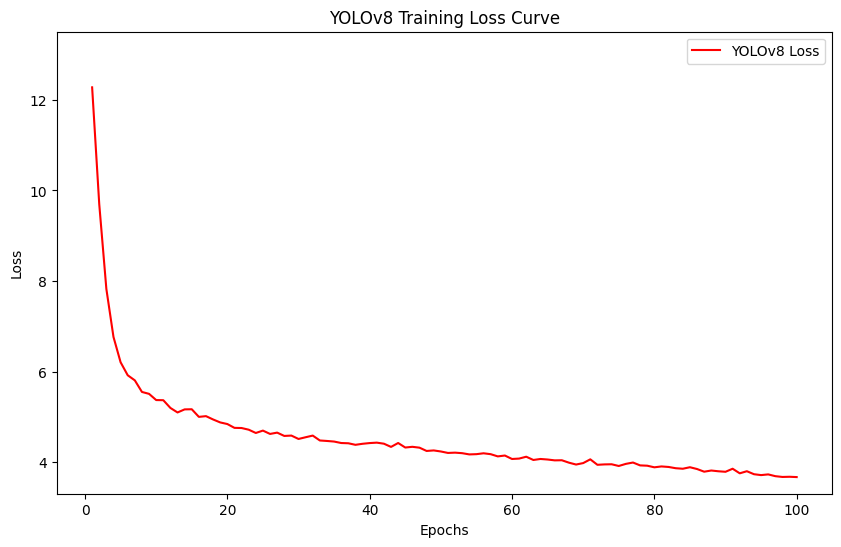

In [10]:
# Plotting the SSD Loss curve
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['SSD Loss'], label='SSD Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SSD Training Loss Curve')
plt.ylim([df['SSD Loss'].min() * 0.9, df['SSD Loss'].max() * 1.1])  # Adjust y-axis scale
plt.legend()
plt.show()

# Plotting the RetinaNet Loss curve
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['RetinaNet Loss'], label='RetinaNet Loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RetinaNet Training Loss Curve')
plt.ylim([df['RetinaNet Loss'].min() * 0.9, df['RetinaNet Loss'].max() * 1.1])  # Adjust y-axis scale
plt.legend()
plt.show()

# Plotting the YOLOv8 Loss curve
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['YOLOv8  Loss'], label='YOLOv8 Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('YOLOv8 Training Loss Curve')
plt.ylim([df['YOLOv8  Loss'].min() * 0.9, df['YOLOv8  Loss'].max() * 1.1])  # Adjust y-axis scale
plt.legend()
plt.show()


In [10]:
def save_mAP(OUT_DIR, map_05, map):
    figure = plt.figure(figsize=(10, 7), num=1, clear=True)
    ax = figure.add_subplot()
    ax.plot(map_05, color='tab:orange', linestyle='-', label='mAP@0.5')
    ax.plot(map, color='tab:red', linestyle='-', label='mAP@0.5:0.95')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('mAP')
    ax.grid()
    ax.legend()
    figure.savefig(f"{OUT_DIR}/map.png")

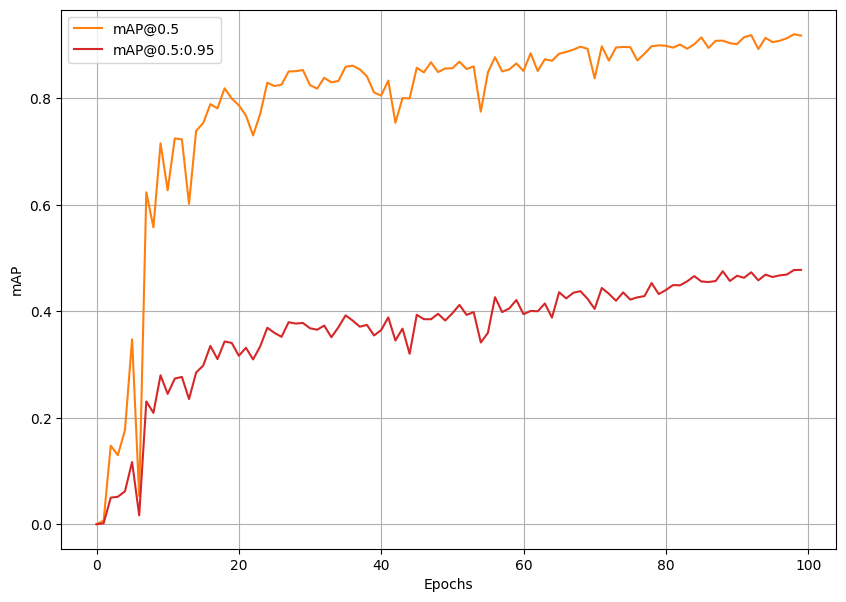

In [11]:
# Load the CSV file
file_path = '/home/jupyter/ee_tree_counting/Report/YOLOv8s_normal_results.csv'
data = pd.read_csv(file_path)

# Remove spaces from column names
data.columns = data.columns.str.strip()

# Extract mAP@0.5 and mAP@0.5:0.95 values
map_05 = data['metrics/mAP50(B)']
map_05_95 = data['metrics/mAP50-95(B)']

# Plot and save the mAP curves
OUT_DIR = '/home/jupyter/ee_tree_counting/Report'  # Specify your output directory here
save_mAP(OUT_DIR, map_05, map_05_95)

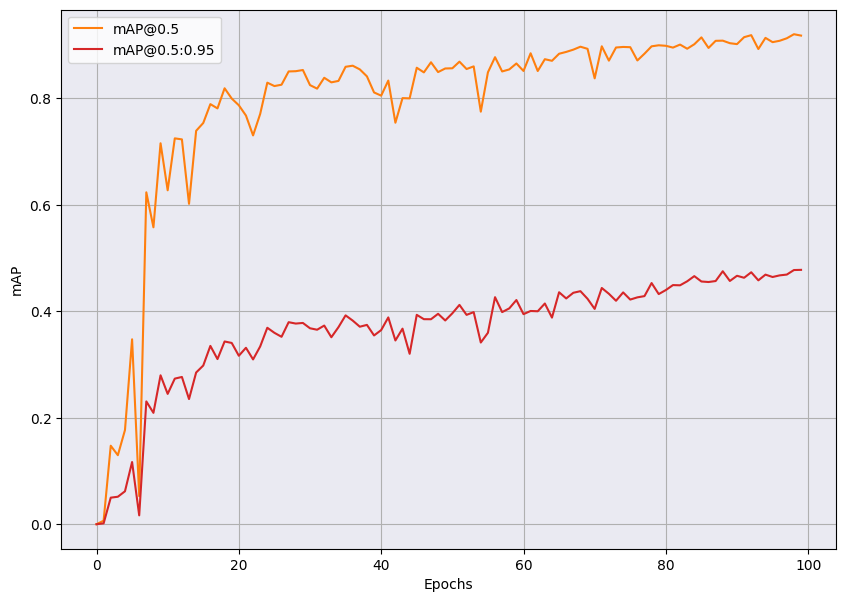

In [13]:

def save_mAP(OUT_DIR, map_05, map):
    figure = plt.figure(figsize=(10, 7), num=1, clear=True)
    ax = figure.add_subplot()
    
    # Set the background color to light grey
    ax.set_facecolor('#EAEAF2')
    
    # Plot the mAP curves
    ax.plot(map_05, color='tab:orange', linestyle='-', label='mAP@0.5')
    ax.plot(map, color='tab:red', linestyle='-', label='mAP@0.5:0.95')
    
    # Set axis labels
    ax.set_xlabel('Epochs')
    ax.set_ylabel('mAP')
    ax.grid()
    # Add a legend
    ax.legend()
    
    # Save the figure
    figure.savefig(f"{OUT_DIR}/map.png")

OUT_DIR = '/home/jupyter/ee_tree_counting/Report'
save_mAP(OUT_DIR, map_05, map_05_95)


In [37]:
file_path = '/home/jupyter/ee_tree_counting/Report/Results.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
df = pd.read_excel(xls, sheet_name='Validation mAP')

In [42]:

def save_mAP(OUT_DIR, map_05, map):
    plt.style.use('seaborn-whitegrid')  # Use the same style as the reference image
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plotting the mAP curves
    ax.plot(map_05, color='tab:orange', linestyle='-', label='mAP@0.5')
    ax.plot(map, color='tab:red', linestyle='-', label='mAP@0.5:0.95')

    # Setting labels and legend
    ax.set_xlabel('Epochs')
    ax.set_ylabel('mAP')
    ax.legend()

    # Set the y-axis increments to 0.1
    ax.set_yticks([i/10 for i in range(0, 11)])

    # Set the background color to match the reference
    ax.set_facecolor('#e5e5e5')  # Light grey background color
    
    # Customize grid lines to be white
    ax.grid(True, color='white')

    # Save the figure
    fig.savefig(f"{OUT_DIR}/map.png", facecolor=fig.get_facecolor())

    # Show the plot
    plt.show()


/var/tmp/ipykernel_7884/3051172801.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # Use the same style as the reference image


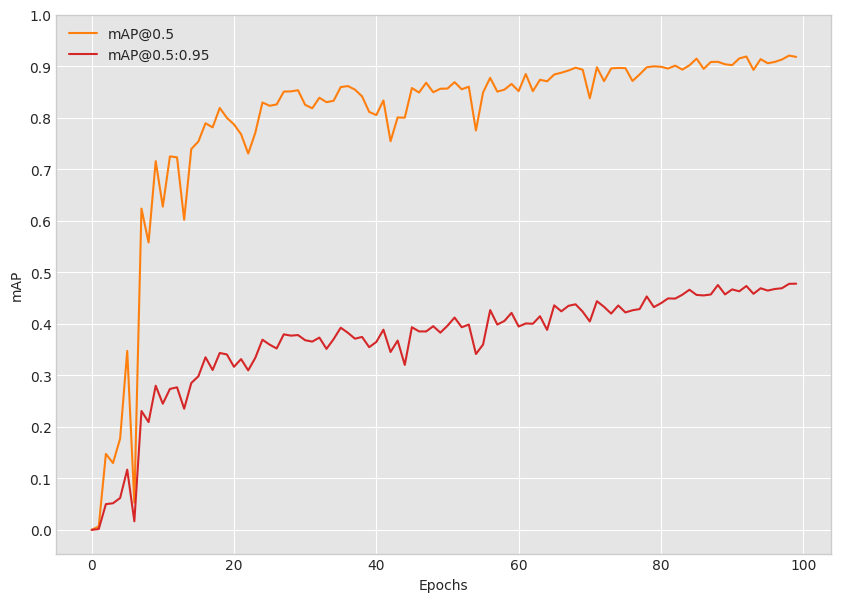

In [43]:
save_mAP(OUT_DIR, map_05, map_05_95)


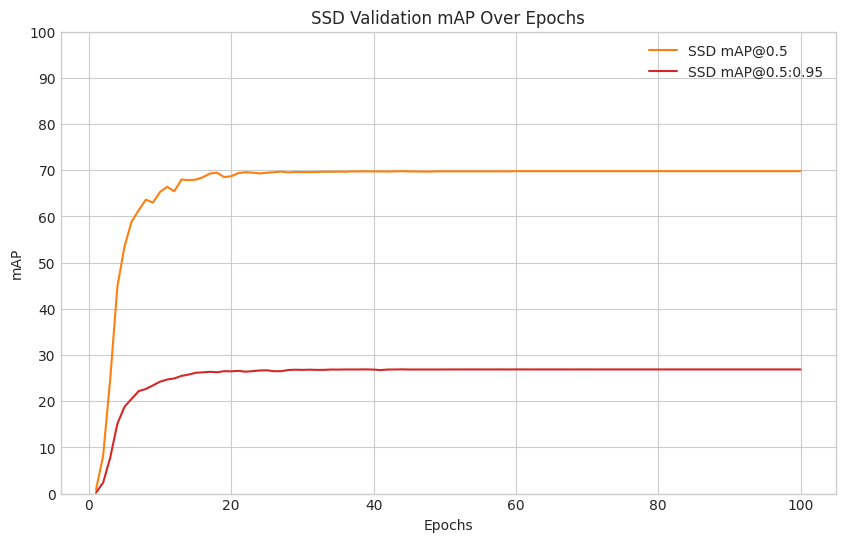

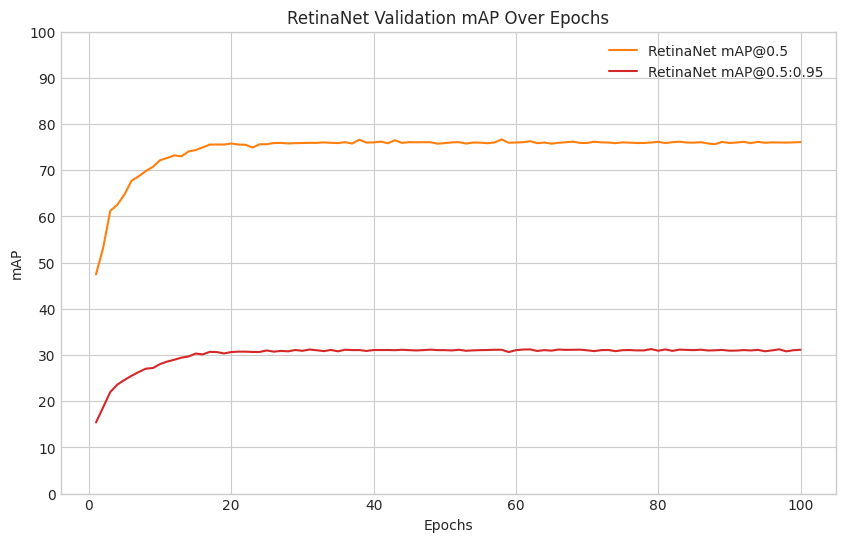

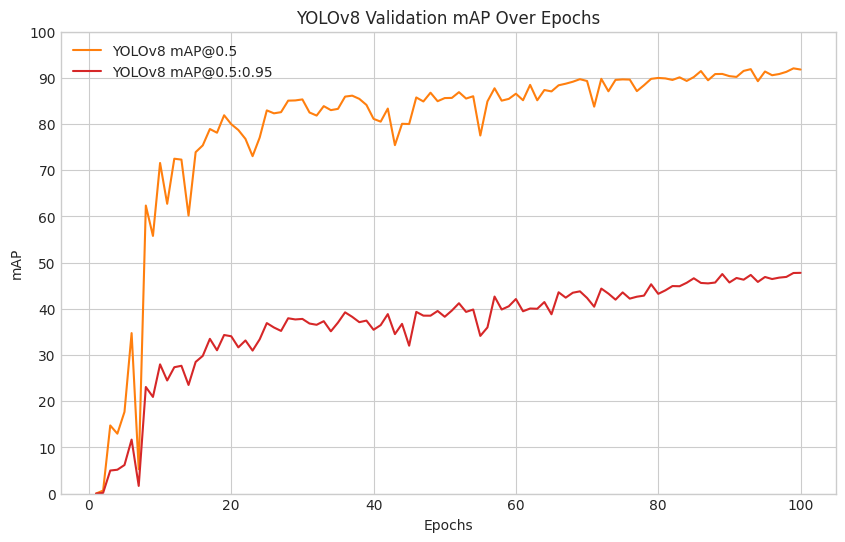

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and sheet
file_path = '/home/jupyter/ee_tree_counting/Report/Results.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Validation mAP')

# Define a function to plot the curves for a specific model
def plot_map(df, model_name, map_50_col, map_50_95_col):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epochs'], df[map_50_col], label=f'{model_name} mAP@0.5', color='tab:orange')
    plt.plot(df['Epochs'], df[map_50_95_col], label=f'{model_name} mAP@0.5:0.95', color='tab:red')

    # Customize y-axis
    plt.ylim(0, 100)
    plt.yticks(range(0, 101, 10))  # Setting the y-axis in increments of 10

    # Add labels and title
    plt.xlabel('Epochs')
    plt.ylabel('mAP')
    plt.title(f'{model_name} Validation mAP Over Epochs')

    # Add grid and legend
    plt.grid(True)
    plt.legend(loc='best')

    # Show plot
    plt.show()

# Plot for SSD
plot_map(df, 'SSD', 'SSD Validation mAP50', 'SSD Validation mAP50-95')

# Plot for RetinaNet
plot_map(df, 'RetinaNet', 'RetinaNet Validation mAP50', 'RetinaNet Validation mAP50-95')

# Plot for YOLOv8
plot_map(df, 'YOLOv8', 'YOLOv8 Validation mAP50 Final', 'YOLOv8 Validation mAP50-95 Final')


## Inference on Test Set using SSD / RetinaNet

In [ ]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/RetinaNet')

import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from RetinaNet import create_model
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset YOLO No Aug/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/RetinaNet Inference'
os.makedirs(output_dir, exist_ok=True)

# Set the color for bounding boxes to blue.
BLUE_COLOR = (255, 0, 0)  # BGR format, blue color

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/RetinaNet/outputs/RetinaNet pretrained tree model/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = glob.glob(f"{test_set_path}/*.jpg")
print(f"Test instances: {len(test_images)}")

frame_count = 0  # To count total frames.
total_fps = 0  # To get the final frames per second.

# To store predictions and ground truths for analysis
predictions = []
ground_truths = []

# Loop through all test images
for i in range(len(test_images)):
    # Get the image file name for saving output later on.
    image_name = test_images[i].split(os.path.sep)[-1].split('.')[0]
    image = cv2.imread(test_images[i])
    orig_image = image.copy()
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    print(image.shape)
    # BGR to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    # Make the pixel range between 0 and 1.
    image /= 255.0
    # Bring color channels to front (H, W, C) => (C, H, W).
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    # Convert to tensor.
    image_input = torch.tensor(image_input, dtype=torch.float).cuda()
    # Add batch dimension.
    image_input = torch.unsqueeze(image_input, 0)
    start_time = time.time()
    # Predictions
    with torch.no_grad():
        outputs = model(image_input.to(DEVICE))
    end_time = time.time()

    # Get the current fps.
    fps = 1 / (end_time - start_time)
    # Total FPS till current frame.
    total_fps += fps
    frame_count += 1

    # Load all detection to CPU for further operations.
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]
    # Count detected boxes and store the count
    if len(outputs[0]['boxes']) != 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        # Filter out boxes according to `detection_threshold`.
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        draw_boxes = boxes.copy()
        # Get all the predicted class names.
        pred_classes = [CLASSES[i] for i in outputs[0]['labels'].cpu().numpy()]

        # Save the number of detected boxes
        predictions.append(len(draw_boxes))

        # Assume ground_truths list contains the actual number of objects in each image
        # You would normally load or calculate these separately
        # For demonstration, I'm using a placeholder; replace with actual ground truth data
        ground_truth = ...  # Replace this with the actual ground truth count
        ground_truths.append(ground_truth)

        # Draw the bounding boxes and write the class name on top of it.
        for j, box in enumerate(draw_boxes):
            class_name = pred_classes[j]
            # Rescale boxes.
            xmin = int((box[0] / image.shape[1]) * orig_image.shape[1])
            ymin = int((box[1] / image.shape[0]) * orig_image.shape[0])
            xmax = int((box[2] / image.shape[1]) * orig_image.shape[1])
            ymax = int((box[3] / image.shape[0]) * orig_image.shape[0])
            # Draw the box in blue color
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), BLUE_COLOR, 3)
            # Draw the class name in blue color
            cv2.putText(orig_image, f"{class_name} {scores[j]:.2f}", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, BLUE_COLOR, 2, lineType=cv2.LINE_AA)

        # If running in a notebook, use this to display images
        from matplotlib import pyplot as plt
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        # Save the output image in the correct directory
        cv2.imwrite(f"{output_dir}/{image_name}.jpg", orig_image)
    print(f"Image {i + 1} done...")
    print('-' * 50)

print('TEST PREDICTIONS COMPLETE')

# After processing all images, compare predictions to ground truth
results_df = pd.DataFrame({
    'Image': [f'Image {i}' for i in range(len(predictions))],
    'Prediction': predictions,
    'Ground Truth': ground_truths
})

# Display the dataframe
print(results_df)

# Calculate Mean Absolute Error (MAE)
mae = (results_df['Prediction'] - results_df['Ground Truth']).abs().mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")



In [57]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/RetinaNet')
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from RetinaNet import create_model
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset YOLO No Aug/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/RetinaNet Inference'
os.makedirs(output_dir, exist_ok=True)

# Set the color for bounding boxes to blue.
BLUE_COLOR = (255, 0, 0)  # BGR format, blue color

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/RetinaNet/outputs/RetinaNet pretrained tree model/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = glob.glob(f"{test_set_path}/*.jpg")
print(f"Test instances: {len(test_images)}")

# Replace with actual ground truth values
ground_truth = [
    86, 7, 48, 48, 48, 48, 64, 69, 69, 69,
    69, 105, 114, 114, 114, 114, 109, 97, 175, 20,
    72, 72, 72, 72, 89, 89, 89, 89, 89, 77,
    77, 77, 77, 148, 112, 112, 112, 112, 72, 72,
    72, 72, 74, 50, 130, 130, 130, 130, 130, 89
]

# Ensure the number of ground truths matches the number of test images
if len(ground_truth) != len(test_images):
    raise ValueError("The number of ground truth values must match the number of test images.")

# To store predictions for analysis
predictions = []

# Loop through all test images
for i, image_path in enumerate(test_images):
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    detected_boxes = len(outputs[0]['boxes'])
    predictions.append(detected_boxes)

    if detected_boxes > 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        boxes = boxes[scores >= detection_threshold].astype(np.int32)

        for box in boxes:
            xmin, ymin, xmax, ymax = box
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), BLUE_COLOR, 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, BLUE_COLOR, 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image': [f'Image {i+1}' for i in range(len(predictions))],
    'Prediction': predictions,
    'Ground Truth': ground_truth
})

# Display the dataframe
print(results_df)

# Calculate Mean Absolute Error (MAE)
mae = (results_df['Prediction'] - results_df['Ground Truth']).abs().mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")


Test instances: 50
       Image  Prediction  Ground Truth
0    Image 1         128            86
1    Image 2         209             7
2    Image 3         125            48
3    Image 4         188            48
4    Image 5         109            48
5    Image 6         183            48
6    Image 7         118            64
7    Image 8          93            69
8    Image 9          71            69
9   Image 10         196            69
10  Image 11         147            69
11  Image 12          90           105
12  Image 13         185           114
13  Image 14         125           114
14  Image 15         138           114
15  Image 16         192           114
16  Image 17          71           109
17  Image 18          85            97
18  Image 19         118           175
19  Image 20         107            20
20  Image 21         185            72
21  Image 22         118            72
22  Image 23         140            72
23  Image 24          94            72
24  Im

In [6]:
import os
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from RetinaNet import create_model
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset YOLO No Aug/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/RetinaNet Inference'
os.makedirs(output_dir, exist_ok=True)

# Set the color for bounding boxes to blue.
BLUE_COLOR = (255, 0, 0)  # BGR format, blue color

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/RetinaNet/outputs/RetinaNet pretrained tree model/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = sorted(glob.glob(f"{test_set_path}/*.jpg"))
print(f"Test instances: {len(test_images)}")

# Replace with actual ground truth values
ground_truth = [
    86, 7, 48, 48, 48, 48, 64, 69, 69, 69,
    69, 105, 114, 114, 114, 114, 109, 97, 175, 20,
    72, 72, 72, 72, 89, 89, 89, 89, 89, 77,
    77, 77, 77, 148, 112, 112, 112, 112, 72, 72,
    72, 72, 74, 50, 130, 130, 130, 130, 130, 89
]

# Ensure the number of ground truths matches the number of test images
if len(ground_truth) != len(test_images):
    raise ValueError("The number of ground truth values must match the number of test images.")

# To store predictions and image names for analysis
predictions = []
image_names = []

# Loop through all test images
for i, image_path in enumerate(test_images):
    # Rename images to a readable format
    image_name = f"image_{i+1}"
    image_names.append(image_name)  # Store renamed image names for later use

    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    # Filter boxes by detection threshold
    scores = outputs[0]['scores'].data.numpy()
    boxes_above_threshold = scores >= detection_threshold
    detected_boxes = len(outputs[0]['boxes'][boxes_above_threshold])
    predictions.append(detected_boxes)

    if detected_boxes > 0:
        boxes = outputs[0]['boxes'][boxes_above_threshold].data.numpy()
        for box in boxes:
            xmin, ymin, xmax, ymax = box.astype(int)  # Convert coordinates to integers
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), BLUE_COLOR, 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, BLUE_COLOR, 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image': image_names,
    'Prediction': predictions,
    'Ground Truth': ground_truth
})

# Display the dataframe
print(results_df)

# Calculate Mean Absolute Error (MAE)
mae = (results_df['Prediction'] - results_df['Ground Truth']).abs().mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")


Test instances: 50
       Image  Prediction  Ground Truth
0    image_1          87            86
1    image_2          20             7
2    image_3          61            48
3    image_4          59            48
4    image_5          59            48
5    image_6          59            48
6    image_7          73            64
7    image_8          69            69
8    image_9          69            69
9   image_10          69            69
10  image_11          69            69
11  image_12          90           105
12  image_13          97           114
13  image_14          97           114
14  image_15          97           114
15  image_16          96           114
16  image_17          58           109
17  image_18         136            97
18  image_19         131           175
19  image_20          46            20
20  image_21          90            72
21  image_22          90            72
22  image_23          92            72
23  image_24          90            72
24  im

In [7]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/SSD')
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from model import create_model
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset YOLO No Aug/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/SSD Inference'
os.makedirs(output_dir, exist_ok=True)

# Set the color for bounding boxes to blue.
BLUE_COLOR = (255, 0, 0)  # BGR format, blue color

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/SSD/outputs/SSD Tree Result/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = sorted(glob.glob(f"{test_set_path}/*.jpg"))
print(f"Test instances: {len(test_images)}")

# Replace with actual ground truth values
ground_truth = [
    86, 7, 48, 48, 48, 48, 64, 69, 69, 69,
    69, 105, 114, 114, 114, 114, 109, 97, 175, 20,
    72, 72, 72, 72, 89, 89, 89, 89, 89, 77,
    77, 77, 77, 148, 112, 112, 112, 112, 72, 72,
    72, 72, 74, 50, 130, 130, 130, 130, 130, 89
]

# Ensure the number of ground truths matches the number of test images
if len(ground_truth) != len(test_images):
    raise ValueError("The number of ground truth values must match the number of test images.")

# To store predictions and image names for analysis
predictions = []
image_names = []

# Loop through all test images
for i, image_path in enumerate(test_images):
    # Rename images to a readable format
    image_name = f"image_{i+1}"
    image_names.append(image_name)  # Store renamed image names for later use

    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    # Filter boxes by detection threshold
    scores = outputs[0]['scores'].data.numpy()
    boxes_above_threshold = scores >= detection_threshold
    detected_boxes = len(outputs[0]['boxes'][boxes_above_threshold])
    predictions.append(detected_boxes)

    if detected_boxes > 0:
        boxes = outputs[0]['boxes'][boxes_above_threshold].data.numpy()
        for box in boxes:
            xmin, ymin, xmax, ymax = box.astype(int)  # Convert coordinates to integers
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), BLUE_COLOR, 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, BLUE_COLOR, 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image': image_names,
    'Prediction': predictions,
    'Ground Truth': ground_truth
})

# Display the dataframe
print(results_df)

# Calculate Mean Absolute Error (MAE)
mae = (results_df['Prediction'] - results_df['Ground Truth']).abs().mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")


Test instances: 50
       Image  Prediction  Ground Truth
0    image_1          89            86
1    image_2           9             7
2    image_3          53            48
3    image_4          53            48
4    image_5          53            48
5    image_6          53            48
6    image_7          69            64
7    image_8          74            69
8    image_9          74            69
9   image_10          74            69
10  image_11          73            69
11  image_12          92           105
12  image_13         100           114
13  image_14         100           114
14  image_15         100           114
15  image_16          98           114
16  image_17          79           109
17  image_18          70            97
18  image_19         133           175
19  image_20          20            20
20  image_21          84            72
21  image_22          84            72
22  image_23          80            72
23  image_24          84            72
24  im

In [9]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/RetinaNet')
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from RetinaNet import create_model  # Assume model.py contains create_model function
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset YOLO No Aug/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/Inference'
os.makedirs(output_dir, exist_ok=True)

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/RetinaNet/outputs/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = glob.glob(f"{test_set_path}/*.jpg")
print(f"Test instances: {len(test_images)}")

total_inference_time = 0  # To accumulate total inference time
frame_count = 0  # To count total frames.

# Loop through all test images
for i, image_path in enumerate(test_images):
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    # Calculate inference time for this image
    inference_time = end_time - start_time
    total_inference_time += inference_time
    frame_count += 1

    # Load all detection to CPU for further operations.
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    detected_boxes = len(outputs[0]['boxes'])
    
    if detected_boxes > 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        boxes = boxes[scores >= detection_threshold].astype(np.int32)

        for box in boxes:
            xmin, ymin, xmax, ymax = box
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Calculate average inference time per image
average_inference_time = total_inference_time / frame_count
print(f"Average Inference Time per Image: {average_inference_time:.4f} seconds")


Test instances: 50
Average Inference Time per Image: 0.0709 seconds


In [10]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/SSD')
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from model import create_model  # Assume model.py contains create_model function
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset YOLO No Aug/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/SSD Inference'
os.makedirs(output_dir, exist_ok=True)

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/SSD/outputs/SSD Tree Result/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = glob.glob(f"{test_set_path}/*.jpg")
print(f"Test instances: {len(test_images)}")

total_inference_time = 0  # To accumulate total inference time
frame_count = 0  # To count total frames.

# Loop through all test images
for i, image_path in enumerate(test_images):
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    # Calculate inference time for this image
    inference_time = end_time - start_time
    total_inference_time += inference_time
    frame_count += 1

    # Load all detection to CPU for further operations.
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    detected_boxes = len(outputs[0]['boxes'])
    
    if detected_boxes > 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        boxes = boxes[scores >= detection_threshold].astype(np.int32)

        for box in boxes:
            xmin, ymin, xmax, ymax = box
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Calculate average inference time per image
average_inference_time = total_inference_time / frame_count
print(f"Average Inference Time per Image: {average_inference_time:.4f} seconds")


Test instances: 50
Average Inference Time per Image: 0.0184 seconds


## Loss Plots

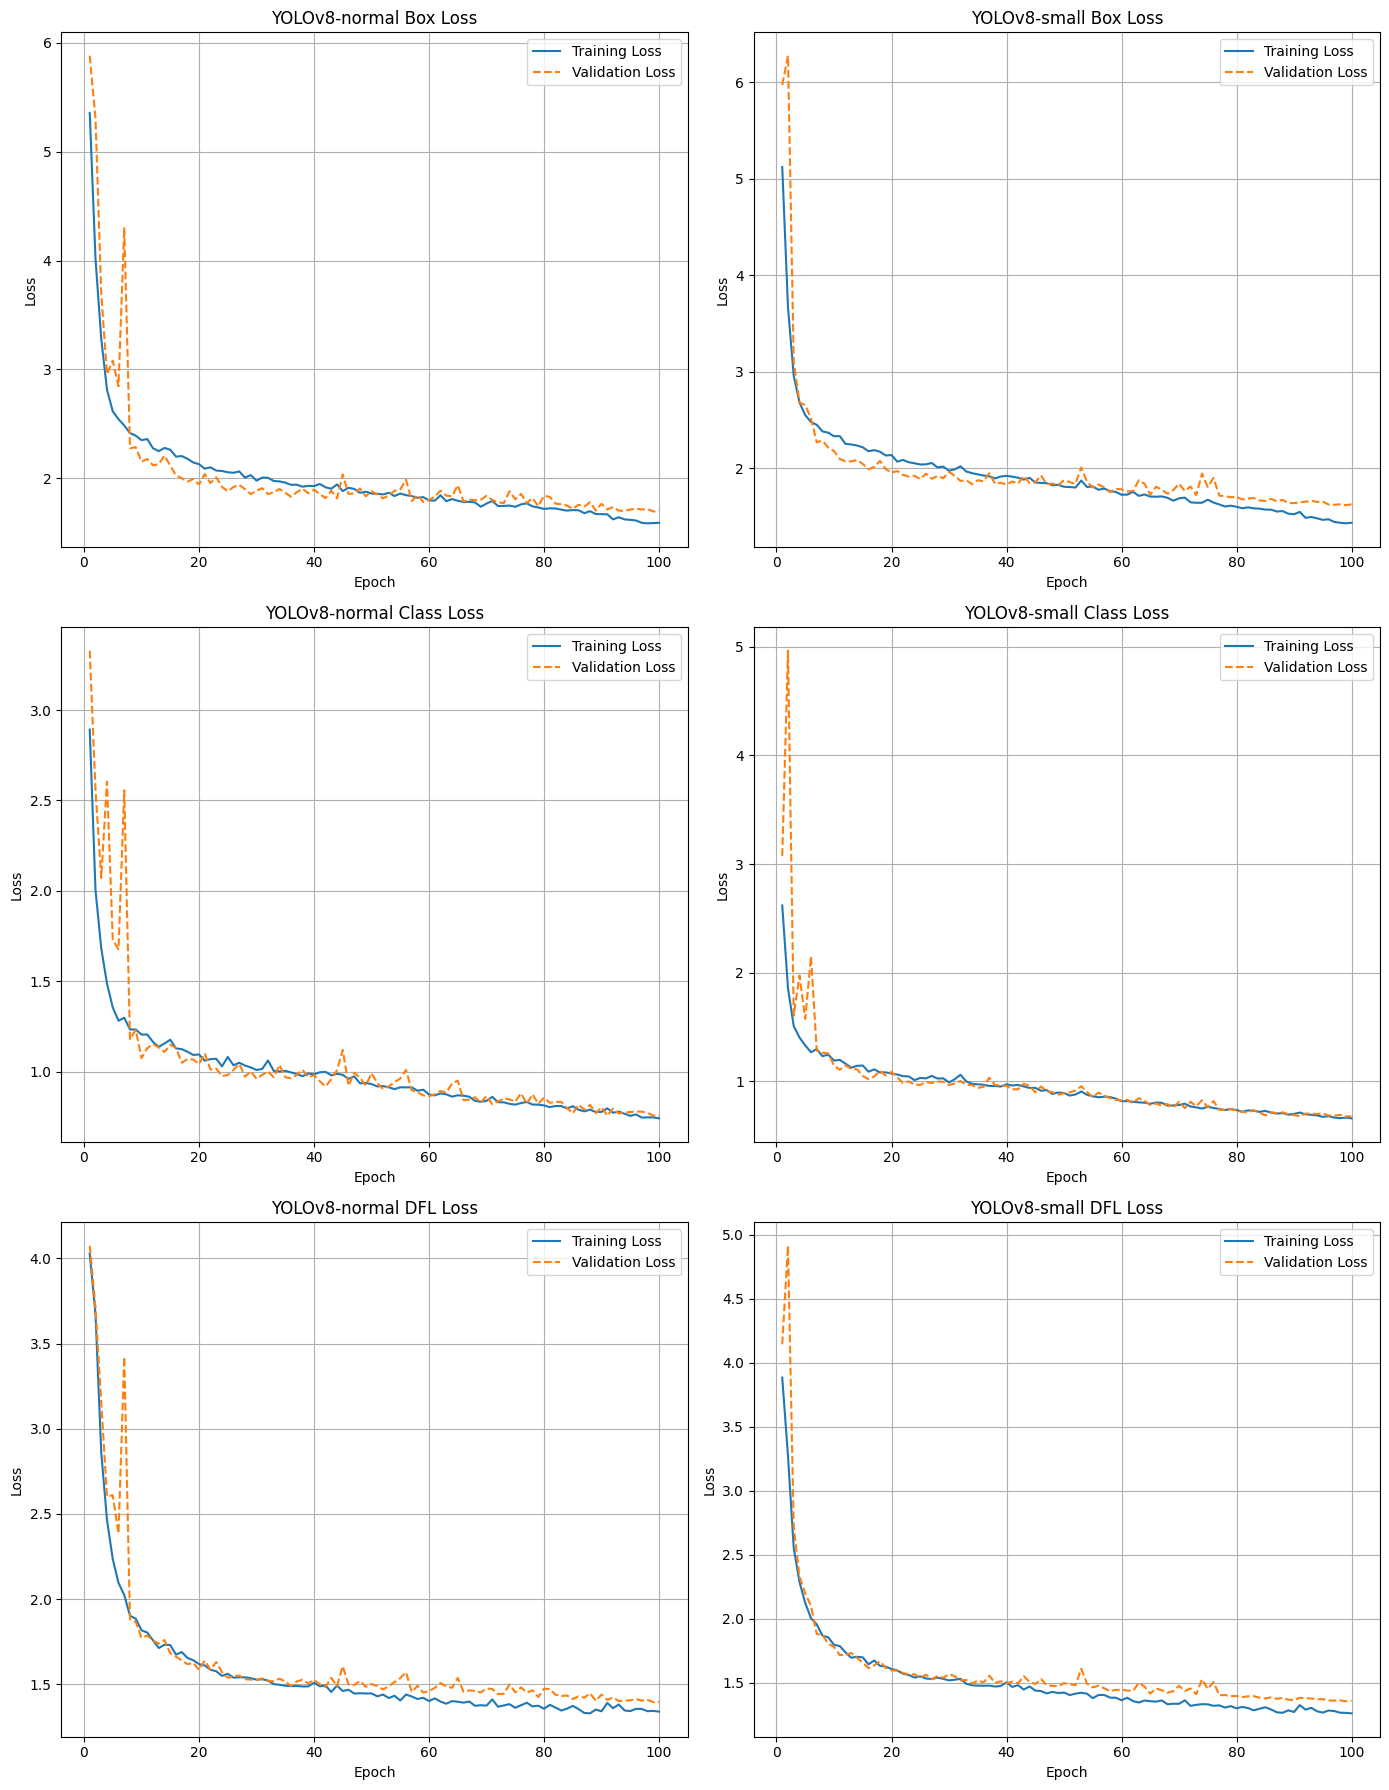

In [7]:
# Load your Excel data (assuming your file is 'Results.xlsx' and the sheet is 'YOLO Losses')
df = pd.read_excel('Results.xlsx', sheet_name='YOLO Losses')

# Plotting function for losses
def plot_losses(epoch, train_loss, val_loss, title, ylabel, ax):
    ax.plot(epoch, train_loss, label='Training Loss')
    ax.plot(epoch, val_loss, label='Validation Loss', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Extracting the data for each model and loss type
epochs = df['Epoch']

# YOLOv8-normal losses
train_box_loss_normal = df['YOLOv8-normal_train/box_loss']
val_box_loss_normal = df['YOLOv8-normal_val/box_loss']
train_cls_loss_normal = df['YOLOv8-normal_train/cls_loss']
val_cls_loss_normal = df['YOLOv8-normal_val/cls_loss']
train_dfl_loss_normal = df['YOLOv8-normal_train/dfl_loss']
val_dfl_loss_normal = df['YOLOv8-normal_val/dfl_loss']

# YOLOv8-small losses
train_box_loss_small = df['YOLOv8-small_train/box_loss']
val_box_loss_small = df['YOLOv8-small_val/box_loss']
train_cls_loss_small = df['YOLOv8-small_train/cls_loss']
val_cls_loss_small = df['YOLOv8-small_val/cls_loss']
train_dfl_loss_small = df['YOLOv8-small_train/dfl_loss']
val_dfl_loss_small = df['YOLOv8-small_val/dfl_loss']

# Creating subplots for YOLOv8-normal
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# YOLOv8-normal plots
plot_losses(epochs, train_box_loss_normal, val_box_loss_normal, 'YOLOv8-normal Box Loss', 'Loss', axes[0, 0])
plot_losses(epochs, train_cls_loss_normal, val_cls_loss_normal, 'YOLOv8-normal Class Loss', 'Loss', axes[1, 0])
plot_losses(epochs, train_dfl_loss_normal, val_dfl_loss_normal, 'YOLOv8-normal DFL Loss', 'Loss', axes[2, 0])

# YOLOv8-small plots
plot_losses(epochs, train_box_loss_small, val_box_loss_small, 'YOLOv8-small Box Loss', 'Loss', axes[0, 1])
plot_losses(epochs, train_cls_loss_small, val_cls_loss_small, 'YOLOv8-small Class Loss', 'Loss', axes[1, 1])
plot_losses(epochs, train_dfl_loss_small, val_dfl_loss_small, 'YOLOv8-small DFL Loss', 'Loss', axes[2, 1])

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [8]:
df

,Epoch,YOLOv8-normal_train/box_loss,YOLOv8-normal_train/cls_loss,YOLOv8-normal_train/dfl_loss,YOLOv8-normal_val/box_loss,YOLOv8-normal_val/cls_loss,YOLOv8-normal_val/dfl_loss,Unnamed: 7,YOLOv8-small_train/box_loss,YOLOv8-small_train/cls_loss,YOLOv8-small_train/dfl_loss,YOLOv8-small_val/box_loss,YOLOv8-small_val/cls_loss,YOLOv8-small_val/dfl_loss
0,1,5.3552,2.89200,4.0277,5.8811,3.32800,4.0746,NaN,5.1204,2.61870,3.8825,5.9710,3.07490,4.1432
1,2,4.0164,2.00480,3.6741,5.3060,2.55670,3.7109,NaN,3.6675,1.85680,3.2702,6.2752,4.96480,4.9134
2,3,3.2804,1.68260,2.8618,3.6958,2.07160,3.1561,NaN,2.9538,1.50710,2.5493,3.1012,1.60630,2.7125
3,4,2.8140,1.48680,2.4649,2.9566,2.60420,2.6019,NaN,2.6794,1.40310,2.2857,2.6783,1.97410,2.3272
4,5,2.6152,1.35580,2.2358,3.0806,1.73070,2.6097,NaN,2.5487,1.32980,2.1211,2.6536,1.57390,2.1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1.6122,0.76371,1.3559,1.7192,0.77951,1.4133,NaN,1.4689,0.67827,1.2812,1.6208,0.68459,1.3598
96,97,1.5909,0.74622,1.3556,1.7133,0.77891,1.4043,NaN,1.4410,0.66528,1.2773,1.6190,0.68178,1.3589
97,98,1.5860,0.74746,1.3421,1.7173,0.77198,1.4085,NaN,1.4324,0.65956,1.2640,1.6237,0.69099,1.3603
98,99,1.5882,0.74719,1.3441,1.6953,0.75760,1.3956,NaN,1.4264,0.66492,1.2630,1.6151,0.67539,1.3541


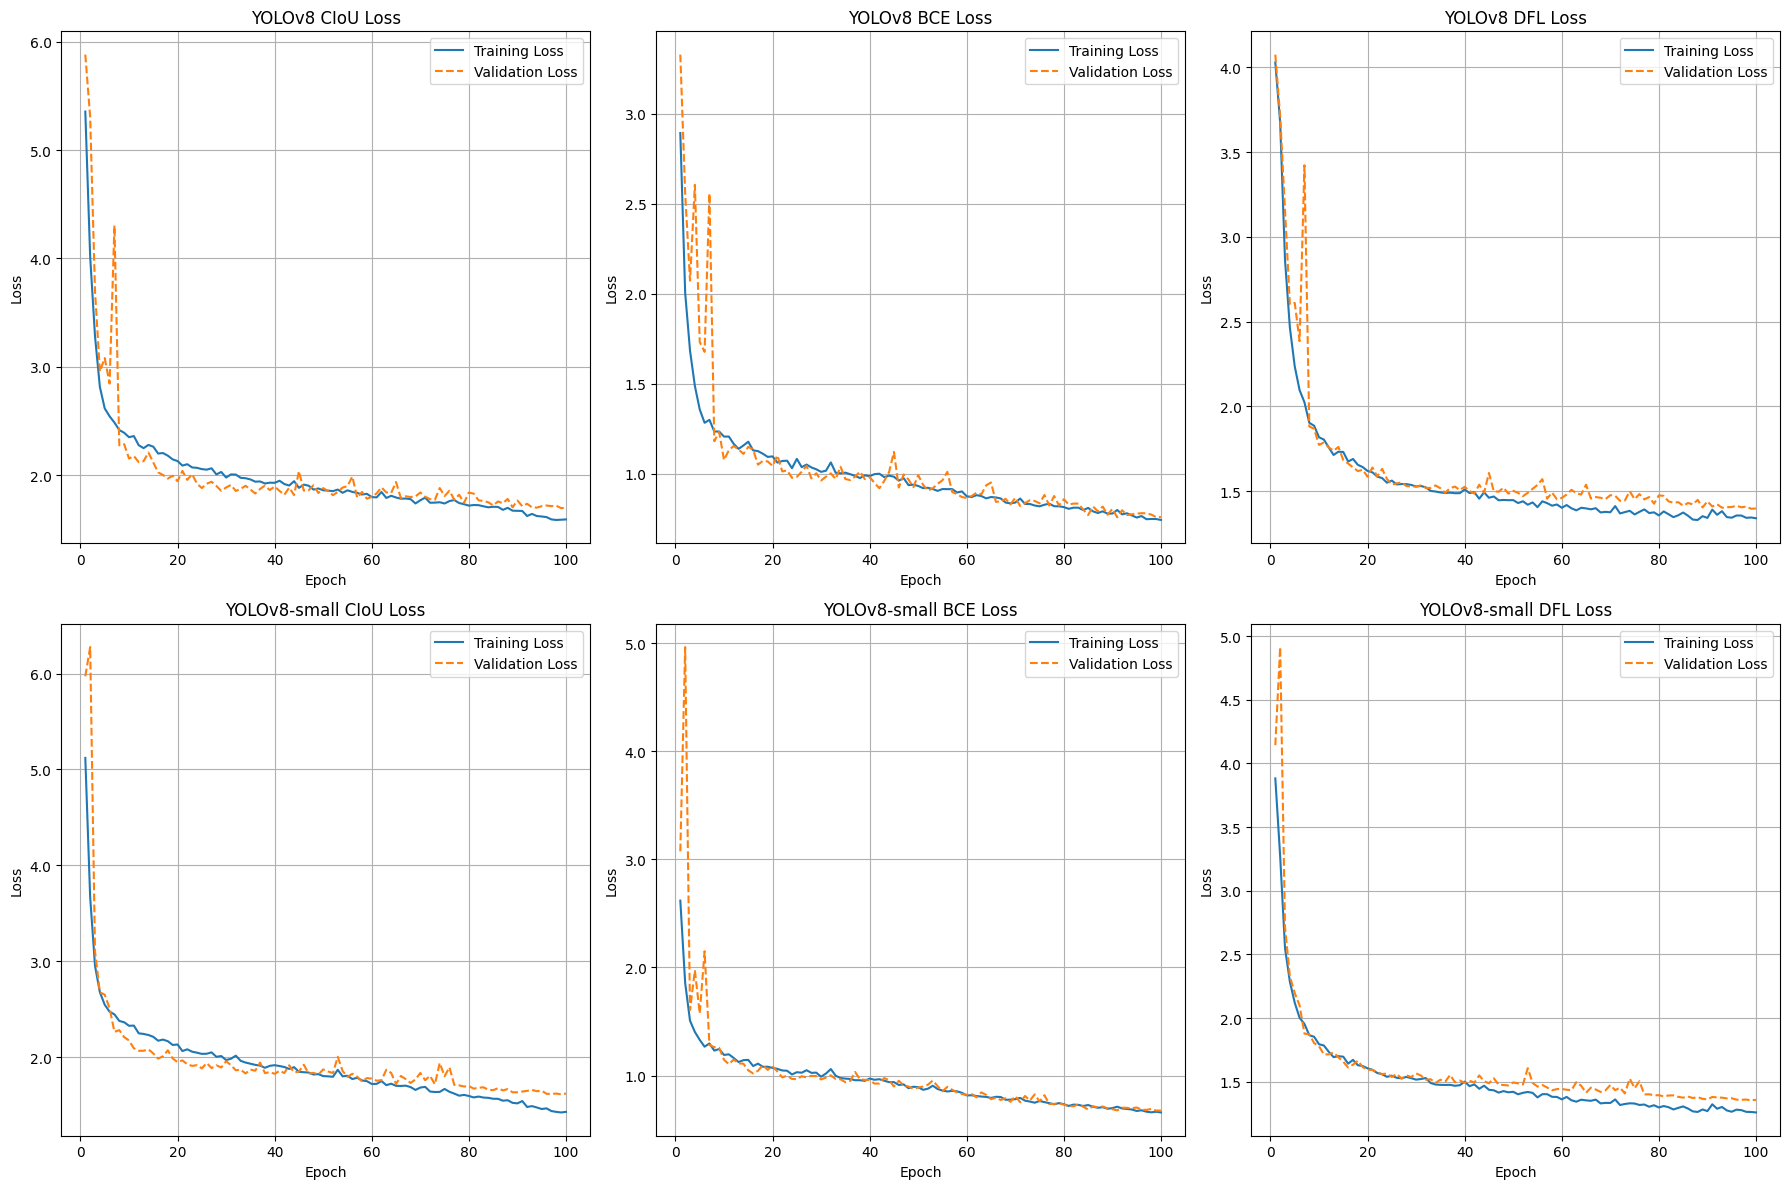

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel data (assuming your file is 'Results.xlsx' and the sheet is 'YOLO Losses')
df = pd.read_excel('Results.xlsx', sheet_name='YOLO Losses')

# Plotting function for losses
def plot_losses(epoch, train_loss, val_loss, title, ylabel, ax):
    ax.plot(epoch, train_loss, label='Training Loss')
    ax.plot(epoch, val_loss, label='Validation Loss', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))

# Extracting the data for each model and loss type
epochs = df['Epoch']

# YOLOv8-normal losses
train_box_loss_normal = df['YOLOv8-normal_train/box_loss']
val_box_loss_normal = df['YOLOv8-normal_val/box_loss']
train_cls_loss_normal = df['YOLOv8-normal_train/cls_loss']
val_cls_loss_normal = df['YOLOv8-normal_val/cls_loss']
train_dfl_loss_normal = df['YOLOv8-normal_train/dfl_loss']
val_dfl_loss_normal = df['YOLOv8-normal_val/dfl_loss']

# YOLOv8-small losses
train_box_loss_small = df['YOLOv8-small_train/box_loss']
val_box_loss_small = df['YOLOv8-small_val/box_loss']
train_cls_loss_small = df['YOLOv8-small_train/cls_loss']
val_cls_loss_small = df['YOLOv8-small_val/cls_loss']
train_dfl_loss_small = df['YOLOv8-small_train/dfl_loss']
val_dfl_loss_small = df['YOLOv8-small_val/dfl_loss']

# Creating subplots with a 2x3 layout (3 plots per model)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# YOLOv8-normal plots (top row)
plot_losses(epochs, train_box_loss_normal, val_box_loss_normal, 'YOLOv8 CIoU Loss', 'Loss', axes[0, 0])
plot_losses(epochs, train_cls_loss_normal, val_cls_loss_normal, 'YOLOv8 BCE Loss', 'Loss', axes[0, 1])
plot_losses(epochs, train_dfl_loss_normal, val_dfl_loss_normal, 'YOLOv8 DFL Loss', 'Loss', axes[0, 2])

# YOLOv8-small plots (bottom row)
plot_losses(epochs, train_box_loss_small, val_box_loss_small, 'YOLOv8-small CIoU Loss', 'Loss', axes[1, 0])
plot_losses(epochs, train_cls_loss_small, val_cls_loss_small, 'YOLOv8-small BCE Loss', 'Loss', axes[1, 1])
plot_losses(epochs, train_dfl_loss_small, val_dfl_loss_small, 'YOLOv8-small DFL Loss', 'Loss', axes[1, 2])

# Adjust layout
plt.tight_layout()

# Save the plot
fig.savefig('YOLOv8_loss_comparisons.png')

# Show plots
plt.show()


## Plotting P R F1 mAP Curves for YOLOv8 and YOLOv8-small

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel data (assuming your file is 'Results.xlsx' and the sheet is 'P R F1')
df = pd.read_excel('Results.xlsx', sheet_name='P R F1')

# Plotting function for metrics
def plot_metrics(epoch, metric_yolov8, metric_yolov8_small, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(epoch, metric_yolov8, label='YOLOv8')
    plt.plot(epoch, metric_yolov8_small, label='YOLOv8-small')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Extracting the data for each metric
epochs = df['Epoch']

# Precision
precision_yolov8 = df['YOLOv8-normal Precision']
precision_yolov8_small = df['YOLOv8-small Precision']

# Recall
recall_yolov8 = df['YOLOv8-normal Recall']
recall_yolov8_small = df['YOLOv8-small Recall']

# F1 Score
f1_yolov8 = df['YOLOv8-normal F1-score']
f1_yolov8_small = df['YOLOv8-small F1-score']

# mAP50
map50_yolov8 = df['YOLOv8-normal mAP50']
map50_yolov8_small = df['YOLOv8-small mAP50']

# mAP0.95
map095_yolov8 = df['YOLOv8-normal mAP50:0.95']
map095_yolov8_small = df['YOLOv8-small mAP50:0.95']

# Plot and save each metric separately
plot_metrics(epochs, map50_yolov8, map50_yolov8_small, 'mAP@50 over Epochs', 'mAP@50', 'map50_comparison.png')
plot_metrics(epochs, map095_yolov8, map095_yolov8_small, 'mAP@0.95 over Epochs', 'mAP@0.95', 'map095_comparison.png')
plot_metrics(epochs, precision_yolov8, precision_yolov8_small, 'Precision over Epochs', 'Precision', 'precision_comparison.png')
plot_metrics(epochs, recall_yolov8, recall_yolov8_small, 'Recall over Epochs', 'Recall', 'recall_comparison.png')
plot_metrics(epochs, f1_yolov8, f1_yolov8_small, 'F1 Score over Epochs', 'F1 Score', 'f1_score_comparison.png')


## MAE Comparison for YOLOv8 and YOLOv8-small

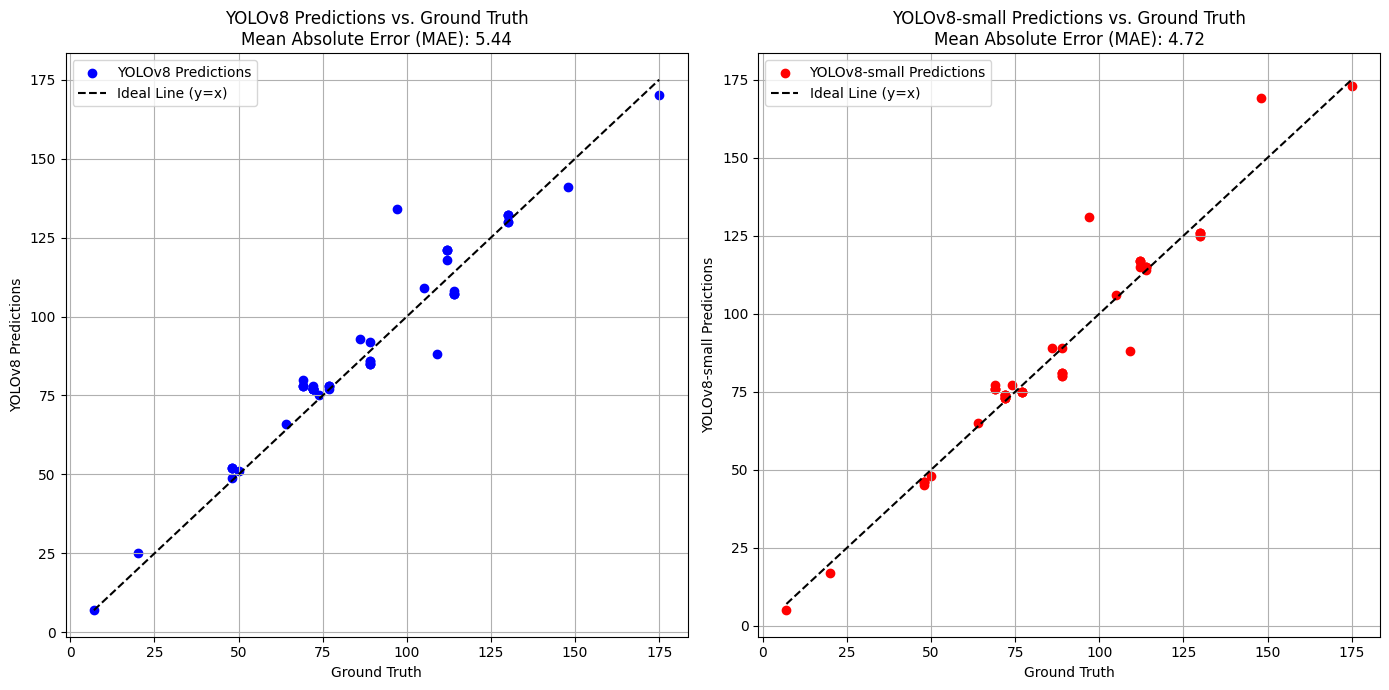

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel data (assuming your file is 'Results.xlsx' and the sheet is 'MAE YOLO')
df = pd.read_excel('Results.xlsx', sheet_name='MAE YOLO')

# Extracting the data for plotting
yolov8_predictions = df['YOLOv8-normal Prediction']
yolov8_small_predictions = df['YOLOv8-small Prediction']
ground_truth = df['Ground Truth']

# Creating subplots for YOLOv8 and YOLOv8-small
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plotting YOLOv8 predictions vs. ground truth
axes[0].scatter(ground_truth, yolov8_predictions, label='YOLOv8 Predictions', color='blue', marker='o')
axes[0].plot([min(ground_truth), max(ground_truth)], [min(ground_truth), max(ground_truth)], 'k--', label='Ideal Line (y=x)')
axes[0].set_title('YOLOv8 Predictions vs. Ground Truth\nMean Absolute Error (MAE): 5.44')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('YOLOv8 Predictions')
axes[0].legend()
axes[0].grid(True)

# Plotting YOLOv8-small predictions vs. ground truth
axes[1].scatter(ground_truth, yolov8_small_predictions, label='YOLOv8-small Predictions', color='red', marker='o')
axes[1].plot([min(ground_truth), max(ground_truth)], [min(ground_truth), max(ground_truth)], 'k--', label='Ideal Line (y=x)')
axes[1].set_title('YOLOv8-small Predictions vs. Ground Truth\nMean Absolute Error (MAE): 4.72')
axes[1].set_xlabel('Ground Truth')
axes[1].set_ylabel('YOLOv8-small Predictions')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('YOLO MAE Comparison')
# Show plots
plt.show()


## Plotting Baseline Results on training and validation data

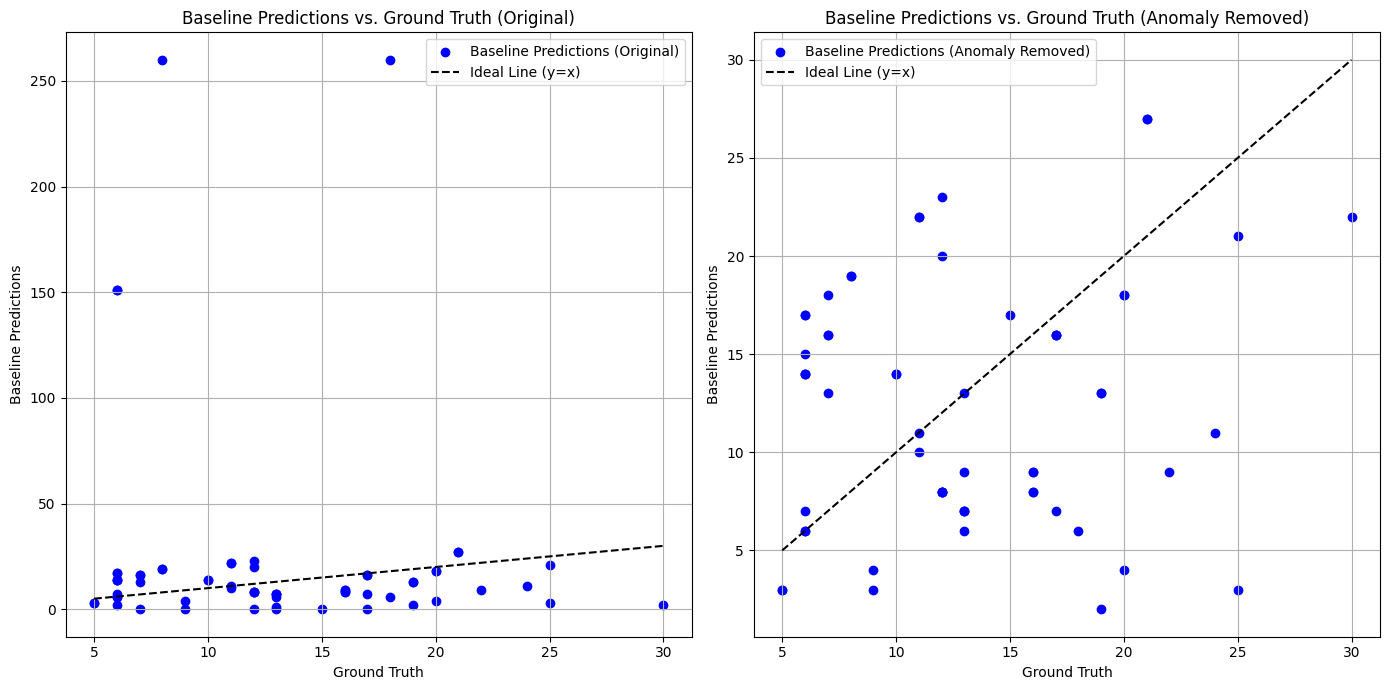

In [15]:
# Load your Excel data
df_original = pd.read_excel('Results.xlsx', sheet_name='Baseline GEE')
df_anomaly_removed = pd.read_excel('Results.xlsx', sheet_name='Baseline GEE + Anomaly Removal')

# Extracting the data for plotting (Original)
baseline_predictions_original = df_original['Prediction']
ground_truth_original = df_original['Ground Truth']

# Extracting the data for plotting (Anomaly Removed)
baseline_predictions_anomaly_removed = df_anomaly_removed['Prediction']
ground_truth_anomaly_removed = df_anomaly_removed['Ground Truth']

# Creating a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the original data
axes[0].scatter(ground_truth_original, baseline_predictions_original, label='Baseline Predictions (Original)', color='blue', marker='o')
axes[0].plot([min(ground_truth_original), max(ground_truth_original)], [min(ground_truth_original), max(ground_truth_original)], 'k--', label='Ideal Line (y=x)')
axes[0].set_title('Baseline Predictions vs. Ground Truth (Original)')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Baseline Predictions')
axes[0].legend()
axes[0].grid(True)

# Plotting the anomaly removed data
axes[1].scatter(ground_truth_anomaly_removed, baseline_predictions_anomaly_removed, label='Baseline Predictions (Anomaly Removed)', color='blue', marker='o')
axes[1].plot([min(ground_truth_anomaly_removed), max(ground_truth_anomaly_removed)], [min(ground_truth_anomaly_removed), max(ground_truth_anomaly_removed)], 'k--', label='Ideal Line (y=x)')
axes[1].set_title('Baseline Predictions vs. Ground Truth (Anomaly Removed)')
axes[1].set_xlabel('Ground Truth')
axes[1].set_ylabel('Baseline Predictions')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('Baseline_vs_GroundTruth_Comparison.png')

# Show plot
plt.show()


Original Data MAE by Country:
       Country  Absolute Error
0       Latvia        7.461538
1  Netherlands       31.620690
2        Spain       13.000000
3  Switzerland        9.692308

Anomaly Removed Data MAE by Country:
       Country  Absolute Error
0       Latvia        7.461538
1  Netherlands        5.320000
2        Spain        5.000000
3  Switzerland        9.692308


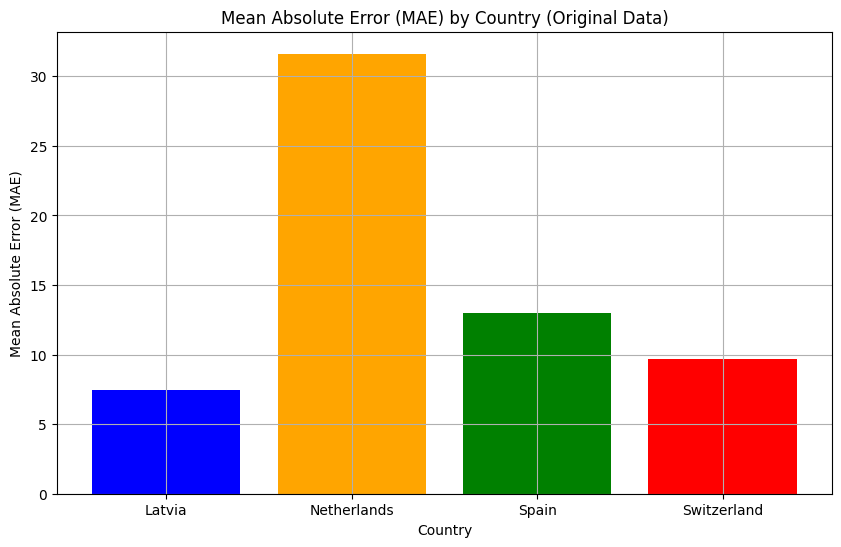

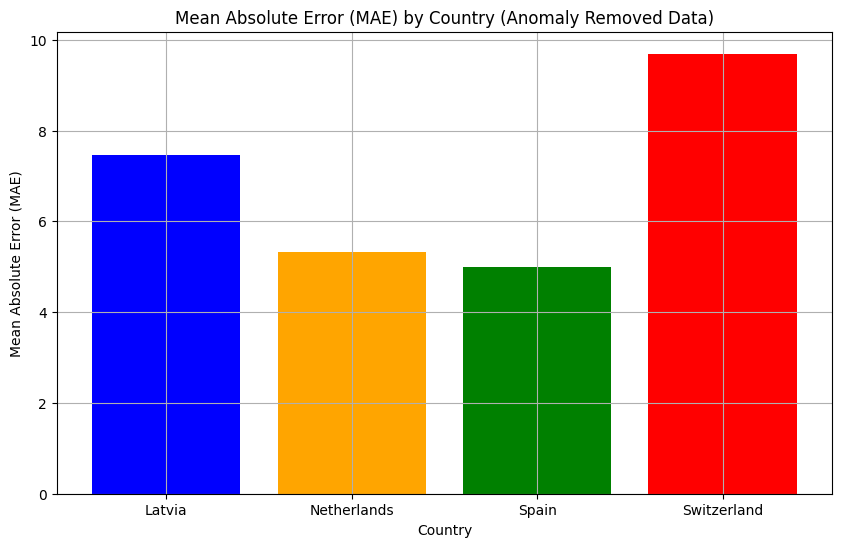

In [13]:
# Function to extract country from the image file name
def extract_country(image_name):
    if 'Netherlands' in image_name:
        return 'Netherlands'
    elif 'Spain' in image_name:
        return 'Spain'
    elif 'switzerland' in image_name:
        return 'Switzerland'
    elif 'Latvia' in image_name:
        return 'Latvia'
    else:
        return 'Unknown'

# Process the original data
df_original['Country'] = df_original['Images'].apply(extract_country)
df_original['Absolute Error'] = abs(df_original['Prediction'] - df_original['Ground Truth'])
country_mae_original = df_original.groupby('Country')['Absolute Error'].mean().reset_index()
print("Original Data MAE by Country:")
print(country_mae_original)

# Process the anomaly removed data
df_anomaly_removed['Country'] = df_anomaly_removed['Images'].apply(extract_country)
df_anomaly_removed['Absolute Error'] = abs(df_anomaly_removed['Prediction'] - df_anomaly_removed['Ground Truth'])
country_mae_anomaly_removed = df_anomaly_removed.groupby('Country')['Absolute Error'].mean().reset_index()
print("\nAnomaly Removed Data MAE by Country:")
print(country_mae_anomaly_removed)

# Plotting the MAE for each country (Original Data)
plt.figure(figsize=(10, 6))
plt.bar(country_mae_original['Country'], country_mae_original['Absolute Error'], color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Absolute Error (MAE) by Country (Original Data)')
plt.xlabel('Country')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.savefig('Country_MAE_Original.png')
plt.show()

# Plotting the MAE for each country (Anomaly Removed Data)
plt.figure(figsize=(10, 6))
plt.bar(country_mae_anomaly_removed['Country'], country_mae_anomaly_removed['Absolute Error'], color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Absolute Error (MAE) by Country (Anomaly Removed Data)')
plt.xlabel('Country')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.savefig('Country_MAE_Anomaly_Removed.png')
plt.show()


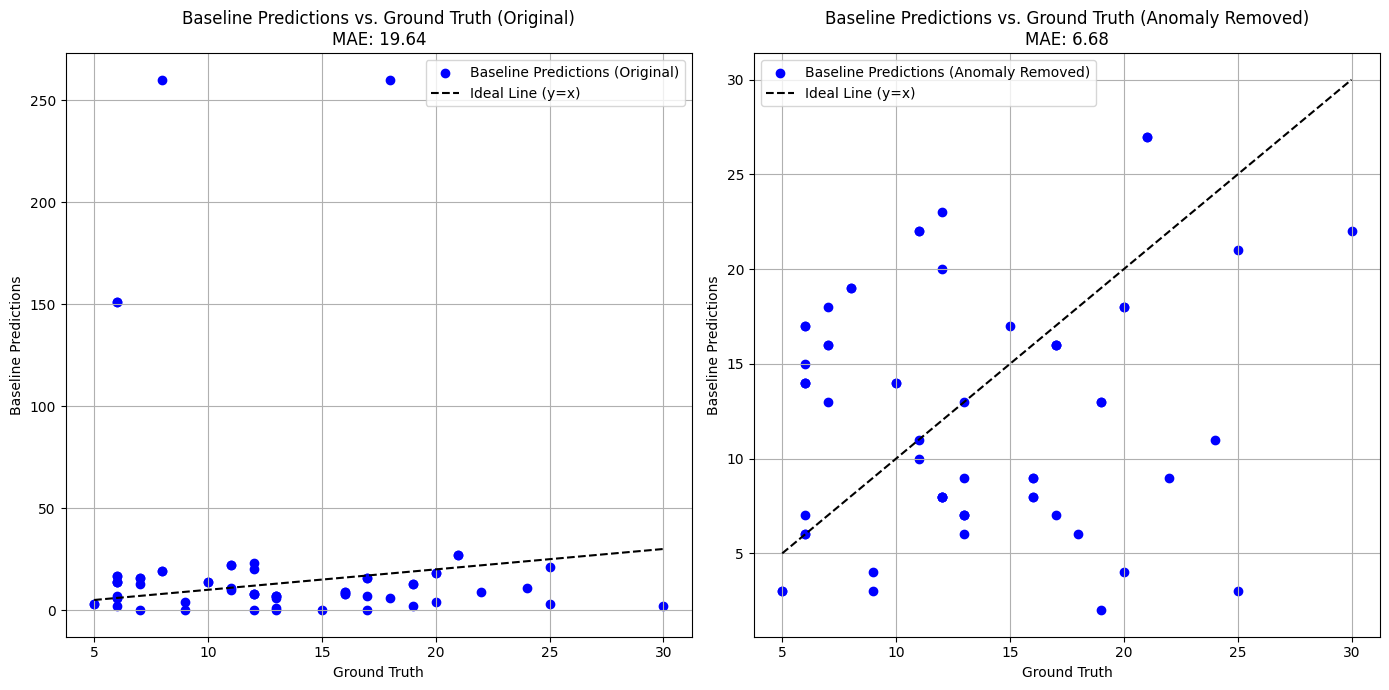

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel data
df_original = pd.read_excel('Results.xlsx', sheet_name='Baseline GEE')
df_anomaly_removed = pd.read_excel('Results.xlsx', sheet_name='Baseline GEE + Anomaly Removal')

# Extracting the data for plotting (Original)
baseline_predictions_original = df_original['Prediction']
ground_truth_original = df_original['Ground Truth']

# Extracting the data for plotting (Anomaly Removed)
baseline_predictions_anomaly_removed = df_anomaly_removed['Prediction']
ground_truth_anomaly_removed = df_anomaly_removed['Ground Truth']

# Calculate MAE for both datasets
mae_original = abs(baseline_predictions_original - ground_truth_original).mean()
mae_anomaly_removed = abs(baseline_predictions_anomaly_removed - ground_truth_anomaly_removed).mean()

# Creating a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the original data
axes[0].scatter(ground_truth_original, baseline_predictions_original, label='Baseline Predictions (Original)', color='blue', marker='o')
axes[0].plot([min(ground_truth_original), max(ground_truth_original)], [min(ground_truth_original), max(ground_truth_original)], 'k--', label='Ideal Line (y=x)')
axes[0].set_title(f'Baseline Predictions vs. Ground Truth (Original)\nMAE: {mae_original:.2f}')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Baseline Predictions')
axes[0].legend()
axes[0].grid(True)

# Plotting the anomaly removed data
axes[1].scatter(ground_truth_anomaly_removed, baseline_predictions_anomaly_removed, label='Baseline Predictions (Anomaly Removed)', color='blue', marker='o')
axes[1].plot([min(ground_truth_anomaly_removed), max(ground_truth_anomaly_removed)], [min(ground_truth_anomaly_removed), max(ground_truth_anomaly_removed)], 'k--', label='Ideal Line (y=x)')
axes[1].set_title(f'Baseline Predictions vs. Ground Truth (Anomaly Removed)\nMAE: {mae_anomaly_removed:.2f}')
axes[1].set_xlabel('Ground Truth')
axes[1].set_ylabel('Baseline Predictions')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('Baseline_vs_GroundTruth_Comparison_with_MAE.png')

# Show plot
plt.show()


## RetinaNet/SSD Inference on GEE Test Set

In [7]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/RetinaNet')
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from RetinaNet import create_model
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/GEE Dataset/Dataset YOLO/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/RetinaNet GEE Inference'
os.makedirs(output_dir, exist_ok=True)

# Set the color for bounding boxes to blue.
BLUE_COLOR = (255, 0, 0)  # BGR format, blue color

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/RetinaNet/outputs/RetinaNet pretrained tree model/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = sorted(glob.glob(f"{test_set_path}/*.jpg"))
print(f"Test instances: {len(test_images)}")

# Replace with actual ground truth values
ground_truth = [
    14, 7, 12, 13, 12, 10
]

# Ensure the number of ground truths matches the number of test images
if len(ground_truth) != len(test_images):
    raise ValueError("The number of ground truth values must match the number of test images.")

# To store predictions and image names for analysis
predictions = []
image_names = []

# Loop through all test images
for i, image_path in enumerate(test_images):
    # Rename images to a readable format
    image_name = f"image_{i+1}"
    image_names.append(image_name)  # Store renamed image names for later use

    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    # Filter boxes by detection threshold
    scores = outputs[0]['scores'].data.numpy()
    boxes_above_threshold = scores >= detection_threshold
    detected_boxes = len(outputs[0]['boxes'][boxes_above_threshold])
    predictions.append(detected_boxes)

    if detected_boxes > 0:
        boxes = outputs[0]['boxes'][boxes_above_threshold].data.numpy()
        for box in boxes:
            xmin, ymin, xmax, ymax = box.astype(int)  # Convert coordinates to integers
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), BLUE_COLOR, 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, BLUE_COLOR, 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image': image_names,
    'Prediction': predictions,
    'Ground Truth': ground_truth
})

# Display the dataframe
print(results_df)

# Calculate Mean Absolute Error (MAE)
mae = (results_df['Prediction'] - results_df['Ground Truth']).abs().mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")


Test instances: 6
     Image  Prediction  Ground Truth
0  image_1          35            14
1  image_2          18             7
2  image_3          55            12
3  image_4          30            13
4  image_5          37            12
5  image_6          19            10
Mean Absolute Error (MAE): 21.00


In [ ]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/SSD')
import numpy as np
import cv2
import torch
import glob as glob
import time
import pandas as pd

from model import create_model
from config import NUM_CLASSES, DEVICE, CLASSES, WEIGHTS_PATH

np.random.seed(42)

# Define the variables directly
test_set_path = '/home/jupyter/ee_tree_counting/Data/GEE Dataset/Dataset YOLO/test/images' 
image_size = None  # Set this to the desired image size, e.g., 640, or leave it as None to use original size
detection_threshold = 0.25  # Set the detection threshold

output_dir = 'visualisations/SSD GEE Inference'
os.makedirs(output_dir, exist_ok=True)

# Set the color for bounding boxes to blue.
BLUE_COLOR = (255, 0, 0)  # BGR format, blue color

# Load the best model and trained weights.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
checkpoint = torch.load('/home/jupyter/ee_tree_counting/Models/SSD/outputs/SSD GEE Result/best_model.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE).eval()

# Directory where all the images are present.
test_images = sorted(glob.glob(f"{test_set_path}/*.jpg"))
print(f"Test instances: {len(test_images)}")

# Replace with actual ground truth values
ground_truth = [
    14, 7, 12, 13, 12, 10
]

# Ensure the number of ground truths matches the number of test images
if len(ground_truth) != len(test_images):
    raise ValueError("The number of ground truth values must match the number of test images.")

# To store predictions and image names for analysis
predictions = []
image_names = []

# Loop through all test images
for i, image_path in enumerate(test_images):
    # Rename images to a readable format
    image_name = f"image_{i+1}"
    image_names.append(image_name)  # Store renamed image names for later use

    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    if image_size is not None:
        image = cv2.resize(image, (image_size, image_size))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_input = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image_input = torch.tensor(image_input, dtype=torch.float).unsqueeze(0).to(DEVICE)

    start_time = time.time()
    with torch.no_grad():
        outputs = model(image_input)
    end_time = time.time()

    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]

    # Filter boxes by detection threshold
    scores = outputs[0]['scores'].data.numpy()
    boxes_above_threshold = scores >= detection_threshold
    detected_boxes = len(outputs[0]['boxes'][boxes_above_threshold])
    predictions.append(detected_boxes)

    if detected_boxes > 0:
        boxes = outputs[0]['boxes'][boxes_above_threshold].data.numpy()
        for box in boxes:
            xmin, ymin, xmax, ymax = box.astype(int)  # Convert coordinates to integers
            cv2.rectangle(orig_image, (xmin, ymin), (xmax, ymax), BLUE_COLOR, 3)
            cv2.putText(orig_image, f"tree", (xmin, ymin - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, BLUE_COLOR, 2, lineType=cv2.LINE_AA)

        cv2.imwrite(os.path.join(output_dir, f"{image_name}.jpg"), orig_image)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Image': image_names,
    'Prediction': predictions,
    'Ground Truth': ground_truth
})

# Display the dataframe
print(results_df)

# Calculate Mean Absolute Error (MAE)
mae = (results_df['Prediction'] - results_df['Ground Truth']).abs().mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")


## Final Comparison on GEE Test Set

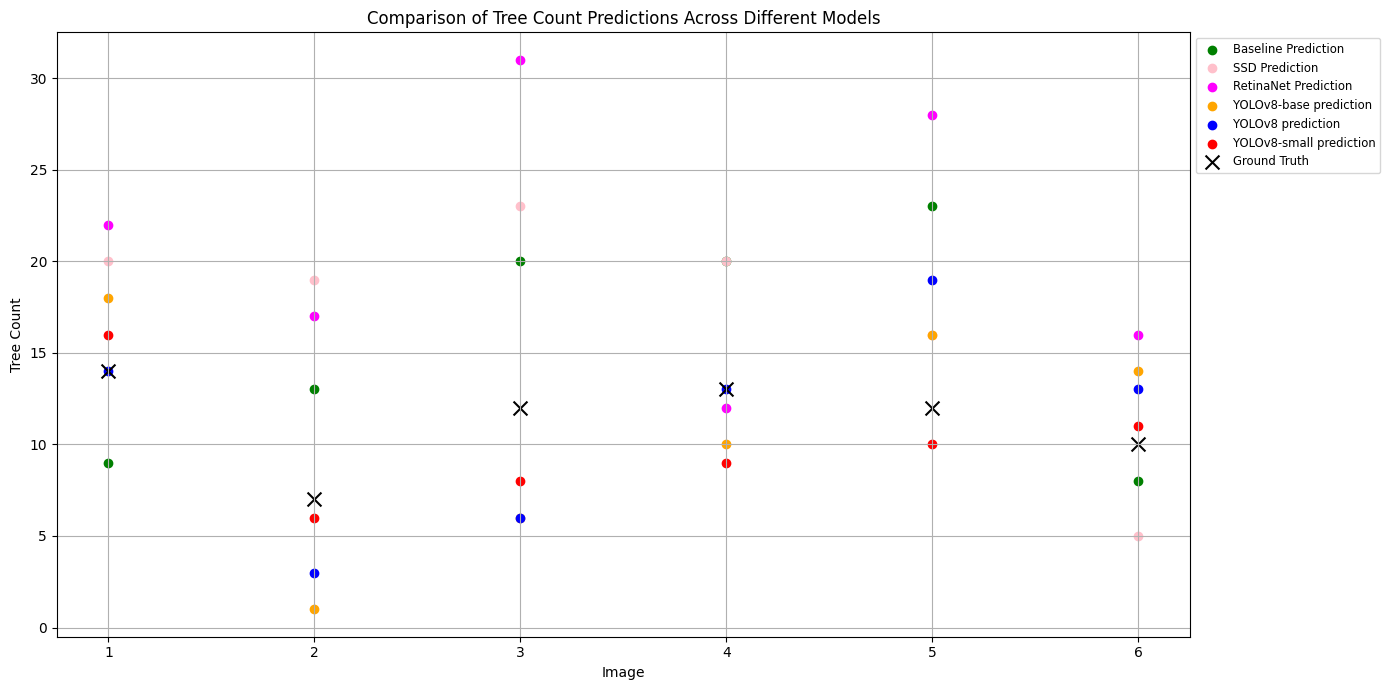

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel data
df = pd.read_excel('Results.xlsx', sheet_name='GEE')

# Extracting the data for plotting
images = df['Image']
baseline_predictions = df['Baseline Prediction']
ssd_predictions = df['SSD Prediction']
# ssd_base_predictions = df['SSD base prediction']
retinanet_predictions = df['RetinaNet Prediction']
# retinanet_base_predictions = df['RetinaNet-base prediction']
yolov8_base_predictions = df['YOLOv8-base prediction']
yolov8_predictions = df['YOLOv8 prediction']
yolov8_small_predictions = df['YOLOv8-small prediction']
ground_truth = df['Ground Truth']

# Create a figure
plt.figure(figsize=(14, 7))

# Plot the predictions for each model as scatter plots (no lines connecting the dots)
plt.scatter(images, baseline_predictions, label='Baseline Prediction', color='green')
plt.scatter(images, ssd_predictions, label='SSD Prediction', color='pink')
# plt.scatter(images, ssd_base_predictions, label='SSD base prediction', color='cyan')
plt.scatter(images, retinanet_predictions, label='RetinaNet Prediction', color='magenta')
# plt.scatter(images, retinanet_base_predictions, label='RetinaNet-base prediction', color='purple')
plt.scatter(images, yolov8_base_predictions, label='YOLOv8-base prediction', color='orange')
plt.scatter(images, yolov8_predictions, label='YOLOv8 prediction', color='blue')
plt.scatter(images, yolov8_small_predictions, label='YOLOv8-small prediction', color='red')

# Plot ground truth with a distinct style (no line connection)
plt.scatter(images, ground_truth, label='Ground Truth', color='black', marker='x', s=100)

# Add labels and title
plt.xlabel('Image')
plt.ylabel('Tree Count')
plt.title('Comparison of Tree Count Predictions Across Different Models')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Add grid
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the plot
plt.savefig('Tree_Count_Predictions_Comparison.png')

# Show plot
plt.show()


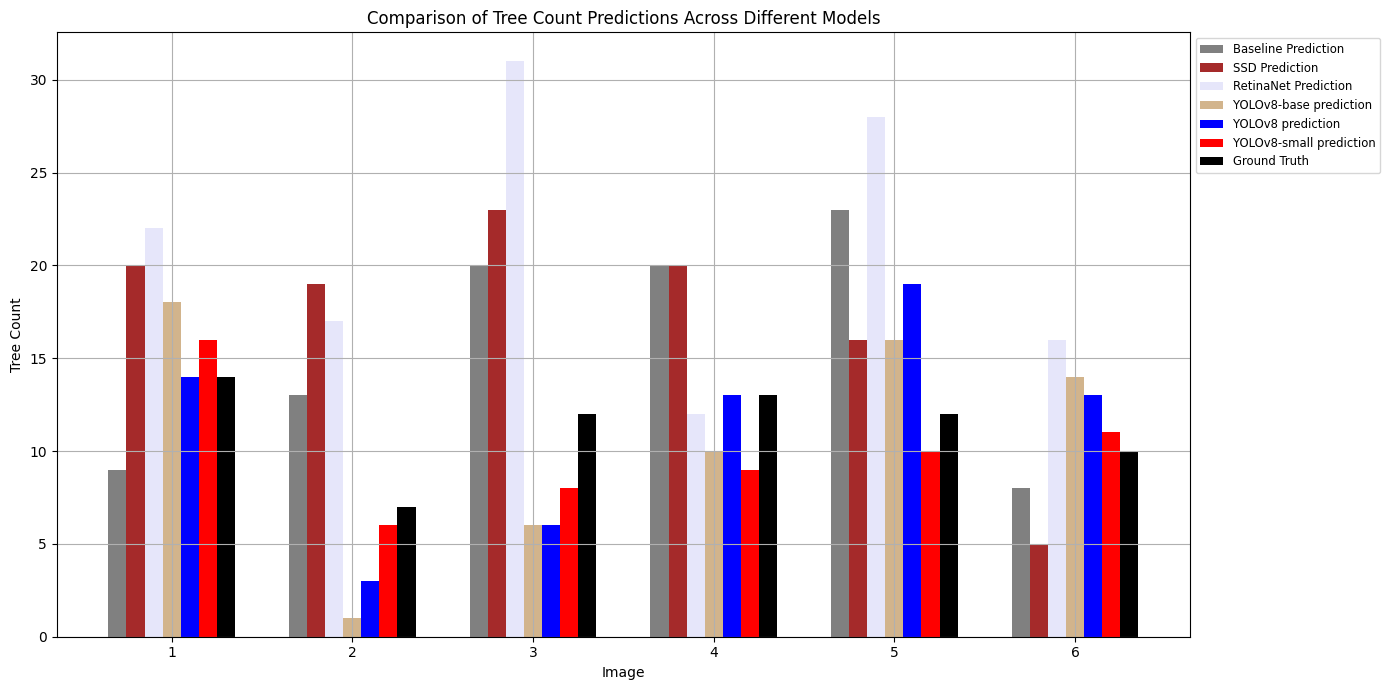

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your Excel data
df = pd.read_excel('Results.xlsx', sheet_name='GEE')

# Extracting the data for plotting
images = df['Image']
baseline_predictions = df['Baseline Prediction']
ssd_predictions = df['SSD Prediction']
retinanet_predictions = df['RetinaNet Prediction']
yolov8_base_predictions = df['YOLOv8-base prediction']
yolov8_predictions = df['YOLOv8 prediction']
yolov8_small_predictions = df['YOLOv8-small prediction']
ground_truth = df['Ground Truth']

# Set the width of the bars and the positions on the x-axis
bar_width = 0.1
index = np.arange(len(images))

# Create a figure
plt.figure(figsize=(14, 7))

# Plot each model's predictions as bars
plt.bar(index, baseline_predictions, bar_width, label='Baseline Prediction', color='grey')
plt.bar(index + bar_width, ssd_predictions, bar_width, label='SSD Prediction', color='brown')
plt.bar(index + 2 * bar_width, retinanet_predictions, bar_width, label='RetinaNet Prediction', color='lavender')
plt.bar(index + 3 * bar_width, yolov8_base_predictions, bar_width, label='YOLOv8-base prediction', color='tan')
plt.bar(index + 4 * bar_width, yolov8_predictions, bar_width, label='YOLOv8 prediction', color='blue')
plt.bar(index + 5 * bar_width, yolov8_small_predictions, bar_width, label='YOLOv8-small prediction', color='red')

# Plot ground truth as a distinct set of bars with a different color
plt.bar(index + 6 * bar_width, ground_truth, bar_width, label='Ground Truth', color='black')

# Add labels and title
plt.xlabel('Image')
plt.ylabel('Tree Count')
plt.title('Comparison of Tree Count Predictions Across Different Models')

# Add xticks to show image numbers
plt.xticks(index + 3 * bar_width, images)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Add grid
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the plot
plt.savefig('Tree_Count_Predictions_Comparison.png')

# Show plot
plt.show()


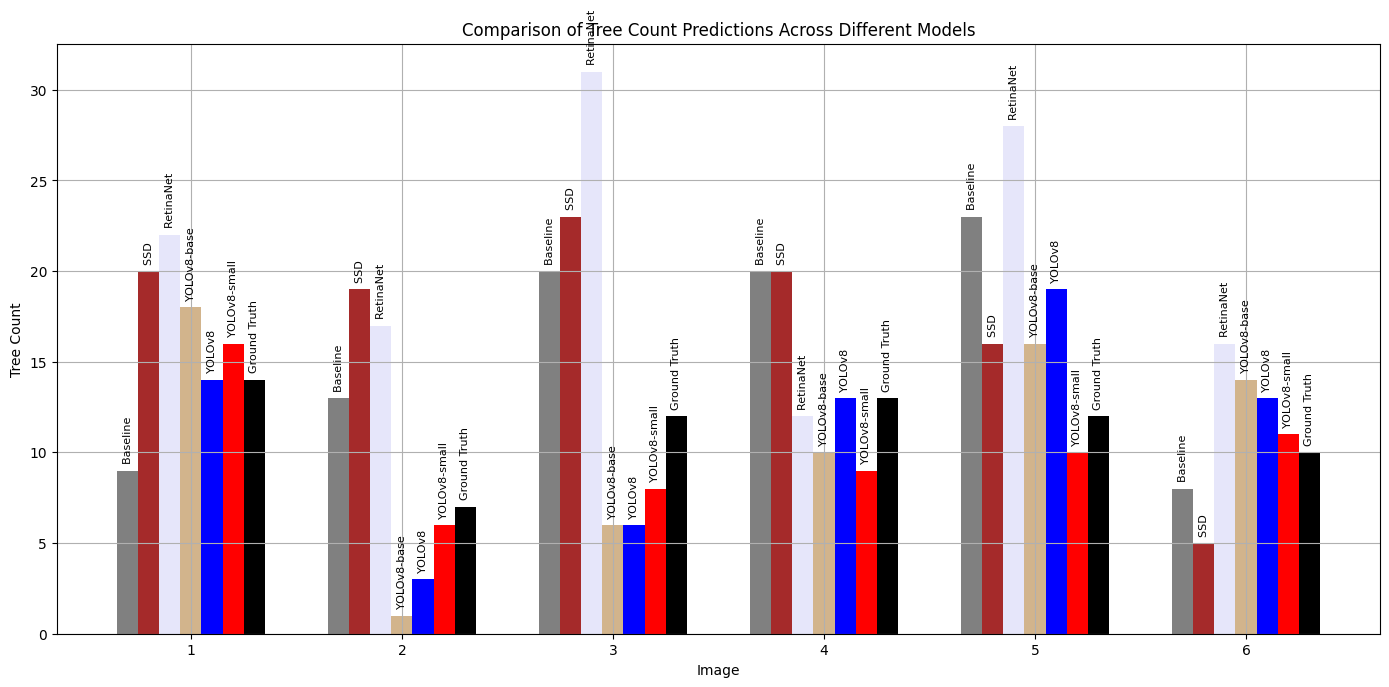

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your Excel data
df = pd.read_excel('Results.xlsx', sheet_name='GEE')

# Extracting the data for plotting
images = df['Image']
baseline_predictions = df['Baseline Prediction']
ssd_predictions = df['SSD Prediction']
retinanet_predictions = df['RetinaNet Prediction']
yolov8_base_predictions = df['YOLOv8-base prediction']
yolov8_predictions = df['YOLOv8 prediction']
yolov8_small_predictions = df['YOLOv8-small prediction']
ground_truth = df['Ground Truth']

# Set the width of the bars and the positions on the x-axis
bar_width = 0.1
index = np.arange(len(images))

# Create a figure
plt.figure(figsize=(14, 7))

# Plot each model's predictions as bars and add labels at the top
bars1 = plt.bar(index, baseline_predictions, bar_width, color='grey')
bars2 = plt.bar(index + bar_width, ssd_predictions, bar_width, color='brown')
bars3 = plt.bar(index + 2 * bar_width, retinanet_predictions, bar_width, color='lavender')
bars4 = plt.bar(index + 3 * bar_width, yolov8_base_predictions, bar_width, color='tan')
bars5 = plt.bar(index + 4 * bar_width, yolov8_predictions, bar_width, color='blue')
bars6 = plt.bar(index + 5 * bar_width, yolov8_small_predictions, bar_width, color='red')
bars7 = plt.bar(index + 6 * bar_width, ground_truth, bar_width, color='black')

# Function to add labels on top of each bar
def add_labels(bars, label):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, label, ha='center', va='bottom', fontsize=8, rotation=90)

# Add the labels for each bar
add_labels(bars1, '  Baseline')
add_labels(bars2, '  SSD')
add_labels(bars3, '  RetinaNet')
add_labels(bars4, '  YOLOv8-base')
add_labels(bars5, '  YOLOv8')
add_labels(bars6, '  YOLOv8-small')
add_labels(bars7, '  Ground Truth')

# Add labels and title
plt.xlabel('Image')
plt.ylabel('Tree Count')
plt.title('Comparison of Tree Count Predictions Across Different Models')

# Add xticks to show image numbers
plt.xticks(index + 3 * bar_width, images)

# Add grid
plt.grid(True)

# Adjust layout to fit everything
plt.tight_layout()

# Save the plot
plt.savefig('Tree_Count_Predictions_Comparison_Labeled.png')

# Show plot
plt.show()


In [6]:
import shutil
import os

# Path to the folder
folder_path = '/home/jupyter/ee_tree_counting/Sample Images'

# Loop through all directories and subdirectories in the folder
for root, dirs, files in os.walk(folder_path, topdown=False):
    for name in files:
        file_path = os.path.join(root, name)
        try:
            os.remove(file_path)
            print(f'Deleted file: {file_path}')
        except Exception as e:
            print(f'Error deleting file {file_path}: {e}')
    for name in dirs:
        dir_path = os.path.join(root, name)
        try:
            shutil.rmtree(dir_path)
            print(f'Deleted directory: {dir_path}')
        except Exception as e:
            print(f'Error deleting directory {dir_path}: {e}')


Deleted file: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/.ipynb_checkpoints/results_1-checkpoint.jpg
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/.ipynb_checkpoints/results_2-checkpoint.jpg
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/.ipynb_checkpoints/results_0-checkpoint.jpg
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/results_2.jpg
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/results_1.jpg
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/results_0.jpg
Deleted directory: /home/jupyter/ee_tree_counting/Sample Images/YOLOv8l_normal Predictions/.ipynb_checkpoints
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/BigYOLO Predictions/.ipynb_checkpoints/results_1-checkpoint.jpg
Deleted file: /home/jupyter/ee_tree_counting/Sample Images/BigYOLO Prediction